<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, <br/>Analysis and Security</h1>

<h1 align='center'>Lab 12 - Revision</h1>


*****


## Aim

Our aim in this lab is the following:
- Revise the semester's worth of content and become familiar with content that may be available on the exam

## Learning Outcomes
- L01: Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- L02: Define, query and manipulate a relational database
- L03: Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- L04: Formulate and extract descriptive and predictive statistics from data
- L05: Analyse and interpret results from descriptive and predictive data analysis
- L06: Apply their knowledge to a given problem domain
- L07: Identify potential pitfalls, and social and ethical implications of data science
- L08: Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security

## Preparation


Before starting this lab, we suggest you do the following:
- Watch all previous lectures for this semester.
- Complete all previous labs for this semester, including extensions tasks.

## Introduction:
Congratulations, you have made it to the end of labs for COMP2420. This final lab is a revision lab for you to complete in your own time, modeled after the final exam from 2019 (the questions are different, don't worry). You should use this to study up for the exam and ask your tutor questions while you have the opportunity to, for this lab and any outstanding queries from the previous weeks. 

In [2]:
# Important Imports for the question/s
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MeanShift
import sklearn.metrics as skm
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

import sqlite3
from sqlite3 import Error

# Getting rid of warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Add imports as necessary. You are only allowed to use what is in the standard Anaconda installation in the exam.
import itertools
from sklearn.metrics import accuracy_score,f1_score
from sklearn.decomposition import PCA                   
from sklearn.preprocessing import LabelEncoder

***

## Question 1: Data Analysis

### Q1.1 - Appropiate Graphs

For each of the following scenarios, determine which plot type is most appropriate to reveal the distribution of and/or the relationships between the variable(s) referred to in each sub question. 

Select (with justification) only one plot type from the ones listed below. 

* histogram  
* pie chart  
* bar plot  
* line plot  
* side-by-side boxplots  
* scatter plot  
* stacked bar plot   

1. Sale price and number of bedrooms (assume integer) for houses sold in Canberra in 2010. 

2. Sale price and date of sale for houses sold in Canberra between 2000 and 2017.

3. Time taken by ANU employees in minutes to reach university for year 2017.

4. Country of nationality for students admitted to ANU in 2016, assuming you can combine countries with less than 100 students together.

5. The percentage of female students admitted to ANU each year from 1950 to 2017.

### Q1.2 - Visualisations

The data set `./data/Economist_pensions.csv` is a collection of the percentage of GDP that various OECD countries spent on pension benefits, and the proportion of their population aged 65 and over, also as a percentage. Countries have different set ages for when their people become entitled to claim pension benefits. The proportion of GDP figures represent the GDP expenditure on all pension claims that is allowed by their pension law.

Using the dataset, perform the following tasks:

1. Load the DataFrame. Provide the mean and mode of the government spending on pension benefits as a percentage of the countries GDP.

Mean 8.515714285714287
Mode 0     7.0
1    11.0
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


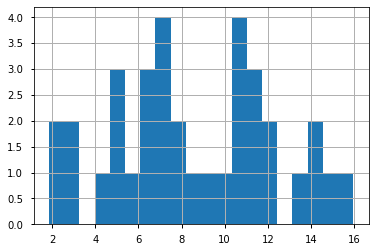

In [4]:
pension_data=pd.read_csv('./data/Economist_pensions.csv')
new_pension = pension_data.drop(pension_data.index[35:38])
print("Mean",new_pension.iloc[:,2].mean())
print("Mode",new_pension.iloc[:,2].round(0).mode()) # rounding the values before finding the modes... why?
print(new_pension.iloc[:,2].hist(bins=20)) # as you can see here we have two modes.

2. Using a Scatter Plot, visualise the relationship between the percentage of a country's population over the age of 65 and the government spending on pension benefits as a percentage of the GDP.
3. Building upon your previous graph, highlight the data points for the following countries and regenerate your graph below the original one. The countries are: Mexico, Turkey, Brazil, Poland, France, Italy, Greece, Japan, United States of America & South Korea.
4. Which visual attribute (in the scatterplot function) from matplotlib is more appropriate for highlighting the previous countries: Colour or Alpha? Justify your answer using an appropriate example.
5. Define the country with the highest ratio of pension benefits as a % of GDP to the % of 65+ fraction of population. Use a distinctive visual feature to highlight it, separately (but in addition to) the other previous highlighted countries.

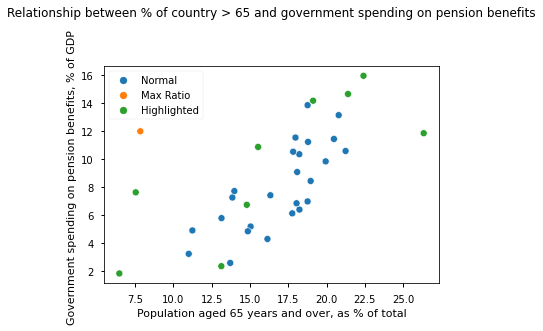

In [5]:
#Question 2
# sns.scatterplot(x=pension_data.iloc[:,2],y=pension_data.iloc[:,1])
# plt.title("Relationship between % of country > 65 and government spending on pension benefits",y=1.2)


#Question 3
countries=['Mexico', 'Turkey', 'Brazil', 'Poland', 'France', 'Italy', 'Greece', 'Japan', 'United States', 'South Korea']
highlight=np.where(pension_data['Country'].isin(countries) , 'Highlighted', 'Normal') #use for loop if want a specific colour for each
# sns.scatterplot(x=pension_data.iloc[:,2],y=pension_data.iloc[:,1], hue=highlight)
# plt.title("Relationship between % of country > 65 and government spending on pension benefits",y=1.2)

#Question 5
ratios=pension_data.iloc[:,2]/pension_data.iloc[:,1]
maxid=ratios.idxmax()
highlight[maxid]='Max Ratio'
ax=sns.scatterplot(x=pension_data.iloc[:,1],y=pension_data.iloc[:,2], hue=highlight)
plt.title("Relationship between % of country > 65 and government spending on pension benefits",y=1.2)

plt.show()



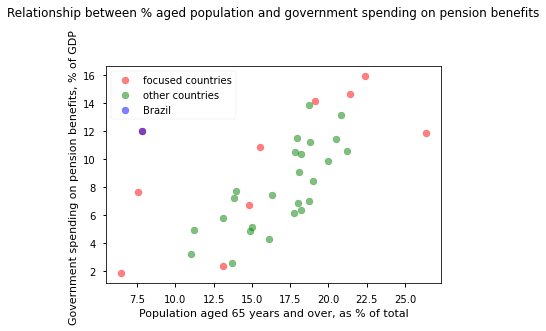

In [14]:
# ALternate plotting method...
#Q1.2 
#we can use the column names to pick the x and y axis, but too long column names :(
#plt.scatter(new_pension['Population aged 65 years and over, as % of total'], new_pension['Government spending on pension benefits, % of GDP '])
#plt.title("Relationship between % of country > 65 and government spending on pension benefits",y=1.2)

#Q1.5
#first, finding the country with the higest ratio to plot separately
pension_data['ratio'] = pension_data.iloc[:,2]/pension_data.iloc[:,1]
higest_country = pension_data.sort_values(by='ratio', ascending=False)[0:1]['Country'].values[0]

country_list = ['Mexico', 'Turkey', 'Brazil', 'Poland', 'France', 'Italy', 'Greece', 'Japan', 'United States', 'South Korea']

#plot these countries in a different colour
filtered_data = pension_data[pension_data['Country'].isin(country_list)]
plt.scatter(x=filtered_data.iloc[:,1],y=filtered_data.iloc[:,2], alpha=0.5, color='r', label='focused countries')

#all the other countries in another color
other_data = pension_data[~pension_data['Country'].isin(country_list)]
plt.scatter(x=other_data.iloc[:,1],y=other_data.iloc[:,2], alpha=0.5, color='g', label='other countries')

#show Brazil in another color
higest_ratio = pension_data[pension_data['Country']==higest_country]
plt.scatter(x=higest_ratio.iloc[:,1],y=higest_ratio.iloc[:,2], alpha=0.5, color='b', label=higest_country)

plt.xlabel(pension_data.columns[1])
plt.ylabel(pension_data.columns[2])
plt.title("Relationship between % aged population and government spending on pension benefits", y=1.2)
plt.legend();

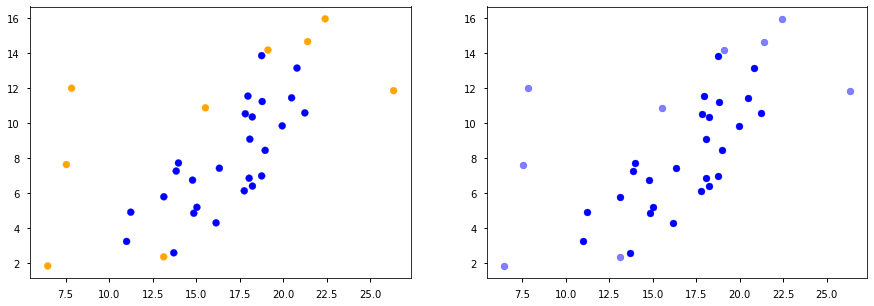

In [5]:
#Question 4:Using Matplotlib to plot scatterplots for comparison
fig = plt.figure(figsize=(15,5))
 
#Colour
ax1 = fig.add_subplot(121)
highlight_c=np.where(pension_data['Country'].isin(countries) ,"orange","blue") #use for loop if want a specific colour for each
ax1=plt.scatter(x=pension_data.iloc[:,1],y=pension_data.iloc[:,2], c=highlight_c)

#Alpha
ax2 = fig.add_subplot(122)
for i in range(pension_data.shape[0]):
    if (pension_data.iloc[:,0][i] in (countries)):
        a = 0.5
    else: a=1
    plt.scatter(x=pension_data.iloc[:,1][i],y=pension_data.iloc[:,2][i], alpha=a, c="blue")

Alpha changes the transparency, which is not standing out in the plot with a white background. Hence changing colour is better.

***

## Question 2: Machine Learning

### Q2.1 - Togepi's Theory Questions
Answer the following theoretical questions regarding machine learning. Ideally, you should not need to do external research to answer them, but if you're stuck you can either refer to your tutor or look through lectures and/or online resources.

1. If your regression line perfectly fits all the points, what is the value of R<sup>2</sup> score? 

2.  If your regression equation looks like $\hat{y}$ = &beta;<sub>0</sub> + &beta;<sub>1</sub>$x$ + &beta;<sub>2</sub>$x^2$ + &beta;<sub>3</sub>$x^3$, is this still a linear regression model? Explain your reasoning

3. What does the statement “independent and identically distributed” (or i.i.d.) define in Machine Learning? Why is it important?

4. Explain the difference between **Flat** and **Hierarchical** clustering

5. What is a loss function? Give an example of a loss function and how it is used in a Machine Learning Algorithm

6. How does the Minimum Sum of Squares (also known as Least Squares or Ordinary Least Squares) optimise a Linear Regression line of fit? Does it require multiple passes on the data or is it a single calculation? Provide a technical explanation of how it works.

$\sum (y_{i}-\hat{y_{i}})^2$

### Q2.2 - Cubone's Classifications 

In [17]:
poke_data = pd.read_csv("./data/pokemon.csv", index_col=0)
poke_data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Using the Pokemon dataset, you will be implementing the Decision Tree and KNN classifers using `sklearn` to predict the `Legendary` status of a pokemon. Perform the following tasks:

1. Complete the following function such that it will return the best combination of 2 columns to use to predict the Legendary status of a pokemon for a KNN classifier when `n_neighbours = 10` . You should check every pair of numerical columns and return the best pair (with the names as a list) based on accuracy.

Note: You should only use numerical columns.

In [20]:
def pairChecker(data):
    """
    Input/s: Dataframe of every column in the dataset
    Expected Output/s: The names of the best performing pair of models based on accuracy of KNN classifier as a list.
    
    Expected steps: Determine the pairs of columns that can be used, for each pair implement a KNN classifier and
                    check the accuracy score. Return the column names of the pair with the best accuracy score as a list.
    """
    column_names=list(poke_data.columns[3:-1]) # remove name, type1, type2 and the taget variable
    
    # we can use the combinations function from itertools to get the column pairs
    # but in the following, we are using nested loops to go through the column pairs
    # combination_list=list(itertools.combinations(column_names,2))
    
    high_score = -1
    best_features = []
    for i in range(len(column_names) - 1):
        for j in range(i+1, len(column_names)):
            
            features_to_test = [column_names[i],column_names[j]]
            iter_df=poke_data[features_to_test]
            iter_df['Legendary']=poke_data['Legendary']

            train,test=train_test_split(iter_df,test_size=0.2)

            knn=KNeighborsClassifier(n_neighbors=10)
            iter_model=knn.fit(train.iloc[:,:-1],train.iloc[:,-1])
            test_score=iter_model.score(test.iloc[:,:-1],test.iloc[:,-1])

            if test_score>high_score:
                high_score = test_score
                best_features =  features_to_test
                
    return best_features

In [24]:
# Tester block
print("Your best pair was: ", pairChecker(poke_data))
if isinstance(pairChecker(poke_data), list):
    print("Output is correct type")
else:
    print("Output is not returned as a list of the column names")

Your best pair was:  ['Total', 'Sp. Def']
Output is correct type


2. Using the best pair you found above, implement a KNN classifier with 10 neighbours and a DecisionTreeClassifier and provide the prediction accuracy score and F1 score for each model.

In [26]:
X=poke_data[pairChecker(poke_data)]
y=poke_data['Legendary']

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

#KNN
knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(train_x,train_y)
pred=knn_model.predict(test_x)
print("KNN")
print("Accuracy score: ",accuracy_score(test_y,pred))
print("F1 score: ",f1_score(test_y,pred))
print()

#DecisionTree
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x,train_y)
pred=dt_model.predict(test_x)
print("DecisionTree")
print("Accuracy score: ",accuracy_score(test_y,pred))
print("F1 score: ",f1_score(test_y,pred))
print()

KNN
Accuracy score:  0.95
F1 score:  0.7333333333333334

DecisionTree
Accuracy score:  0.95
F1 score:  0.7499999999999999



3. What do the above metrics tell you about the performance of your models? Discuss how the metrics show that the models classify differently. Which would you rather use and why?

### Q2.3 - Charmander's Clustering

1. Using the Pokemon dataset, implement the `KMeans` clustering algorithm with `k=5` and `k=3` using `sklearn` or equivalent packages. Provide graphical representations of your clustering outputs.

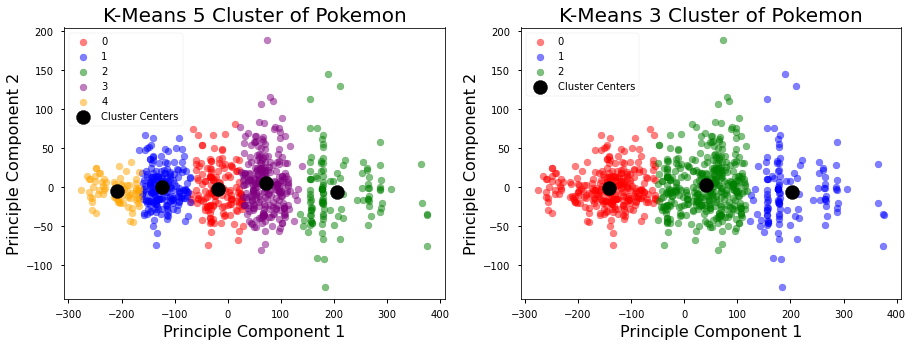

In [27]:
#If we are using numerical data
fig = plt.figure(figsize=(15,5))
colors=["red","blue","green","purple","orange"]

pca = PCA(n_components=2)
poke_reduced=pd.DataFrame(pca.fit_transform(poke_data.iloc[:,3:-1])) 

#Five cluster
km5_model = KMeans(n_clusters=5)
km5_model.fit(poke_reduced)

ax1 = fig.add_subplot(121)
for i in range(np.max(km5_model.labels_)+1):
    plt.scatter(poke_reduced[km5_model.labels_==i].iloc[:,0], poke_reduced[km5_model.labels_==i].iloc[:,1], label=i, c=colors[i], alpha=0.5)
plt.scatter(km5_model.cluster_centers_[:,0], km5_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means 5 Cluster of Pokemon",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()

#Three cluster
km3_model = KMeans(n_clusters=3)
km3_model.fit(poke_reduced)

ax2=fig.add_subplot(122)
for i in range(np.max(km3_model.labels_)+1):
    plt.scatter(poke_reduced[km3_model.labels_==i].iloc[:,0], poke_reduced[km3_model.labels_==i].iloc[:,1], label=i, c=colors[i], alpha=0.5)
plt.scatter(km3_model.cluster_centers_[:,0], km3_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means 3 Cluster of Pokemon",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

2. Which k value is better for your clustering (or is neither appropriate)? Explain how different k values could be more (or less) appropriate.

In [28]:
# Three clsuter
k = np.max(km3_model.labels_)+1
df_clusters = [poke_data[km3_model.labels_==i] for i in range(k)]

clus_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Total' :  [round(df_clusters[i]['Total'].mean(), 2) for i in range(k)],
}
df_cluster_stats = pd.DataFrame(clus_dict)
df_cluster_stats

,Cluster,Size,Mean Total
0,0,289,304.19
1,1,123,622.57
2,2,388,473.18


In [29]:
#Five Cluster
k = np.max(km5_model.labels_)+1
df_clusters = [poke_data[km5_model.labels_==i] for i in range(k)]

clus_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Total' :  [round(df_clusters[i]['Total'].mean(), 2) for i in range(k)],
}
df_cluster_stats = pd.DataFrame(clus_dict)
df_cluster_stats

,Cluster,Size,Mean Total
0,0,153,418.39
1,1,197,321.32
2,2,118,625.46
3,3,257,501.24
4,4,75,241.95


3. Explain the limitations of KMeans and give examples of how and when it would be unsuitable.

***

## Q3: Databases and Relational Algebra 

### Q3.1 Short Answers
Answer the following theoretical questions regarding databases and relational algebra. Again, you should not need to do external research to answer them, but if you're stuck you can either refer to your tutor or look through lectures and/or online resources.

1. What is the difference between the flat file and hierarchical database models? Provide an example of each.

2. What are the typical layers in a 2-tier Architecture model? How can an Architecture be extended to n-layers?

3. What is the difference between a Data-definition and Data-manipulation language?

4. What are the features of a 2NF normalised database?

5. What is the difference between a *well-formed* and a *valid* XML document? Why would you want to check if an XML document is *valid*?

### 3.2 SQL

The following SQL commands were used to create the tables in the "Supplier-Parts-Jobs" database (`spj.db`):

You will need to do further exploration to understand the data. If you make any assumptions on what the data means, state these assumptions clearly.

Please answer the following questions. Provide both the answer, and the SQL you used to achieve the answer.

In [30]:
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one (in memory);
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

dfloc_spj = "./data/spj.db"
conn = create_connection(dfloc_spj) 
cur = conn.cursor()

Connection established!


1. Find the names of all suppliers providing parts for the Console job.

In [31]:
query = "SELECT name FROM suppliers WHERE s_id IN \
            (SELECT s_id FROM requests WHERE j_id IN \
            (SELECT j_id FROM jobs WHERE name='Console'));"
            
df = pd.read_sql_query(query, conn)
df

,name
0,Smith
1,Jones
2,Adams


2. Which Part/s weigh the most?

In [32]:
query = "SELECT p_id, name,weight FROM parts ORDER BY weight DESC LIMIT 1;"
            
df = pd.read_sql_query(query, conn)
df

,p_id,name,weight
0,P6,Cog,19


3. Which part is most stocked by suppliers?

In [33]:
query = "SELECT p_id, MAX(sum) FROM \
            (SELECT p_id, SUM(quantity) AS sum FROM supplier_inventory GROUP BY p_id);"
            
df = pd.read_sql_query(query, conn)
df

,p_id,MAX(sum)
0,P3,6400


4.  Find the s_id and names of suppliers supplying parts to jobs where the city of the supplier, the part, and the job are all different to each other.

In [34]:
query = "SELECT DISTINCT ss.s_id,ss.name FROM requests AS req INNER JOIN\
            suppliers AS ss INNER JOIN\
            parts AS ps INNER JOIN\
            jobs AS js \
            ON req.s_id=ss.s_id AND req.p_id=ps.p_id AND req.j_id=js.j_id\
            WHERE ss.city!=ps.city AND ps.city!=js.city AND js.city!=ss.city;"
            
df = pd.read_sql_query(query, conn)
df

,s_id,name
0,S2,Jones
1,S3,Blake
2,S5,Adams


5. Find all (suppliers, parts) where the supplier doesn't have enough parts to fill their requests.

In [35]:
query="SELECT s_id,p_id FROM supplier_inventory AS si NATURAL JOIN\
        (SELECT s_id,p_id,SUM(quantity) AS sum FROM requests GROUP BY s_id,p_id) AS req\
        WHERE si.quantity<req.sum;"
# query = "SELECT * FROM supplier_inventory AS si INNER JOIN requests AS req\
#             ON si.s_id=req.s_id AND si.p_id=req.p_id\
#             WHERE si.quantity<req.quantity"
            
df = pd.read_sql_query(query, conn)
df

,s_id,p_id
0,S1,P1
1,S4,P6
2,S5,P2


***

## Q4: Security
Answer the following questions regarding security. You should not need to do external research to answer them, but if you're stuck you can either refer to your tutor or look through lectures and/or online resources.

### 4.1: Security Multiple Choice

1. A *fabrication* attack is an attack on:

    1. Availability
    2. Confidentiality
    3. Authenticity
    4. Integrity

2. An RSA public key is given by (e,n) = (3,33). Suppose we want to encrypt the number 7 using this key. Then, the encrypted number is:

    1. 7
    2. 21
    3. 13
    4. 23

3. Which technology is considered to be able to break current public-key encryption algorithms in the future? Select the most appropriate answer.

    1. Probabilistic Computation
    2. Neuron Networks
    3. Quantum Computing
    4. AI

4. Which of the following encryption algorithms is considered unbreakable? Select one or more.

   - RSA
   - El-Gamal
   - One-Time Pad
   - DES
   - AES

5. In creating a digital signature, the sender encrypts the document with (select one):

    - The sender's public key
    - The receiver's public key
    - The sender's private key
    - The receiver's private key
    

### 4.2: Security Short Answers

1. A good hash function needs to be *collision resistant*. What does this mean? Why is this  important?

2. What are the three key principles of the information security triad? Briefly describe each one of these three principles.

3. Bob wants to send a signed, confidential message to Alice. Discuss how he could go about doing this using cryptographic techniques. What are the pros and cons of your suggested approach?

****
## Q5: Ethics
Answer the following questions on ethics. You may need to refer to the lectures or external resources for the first question, but you should not do research for the second question. Feel free to speak to your tutor to discuss your responses.

1. Describe a `PET` and how they can be used to mitigate a number of ethical risks that have been brought up over the course of the semester.

2. Discuss why it is important to consider ethical implications when creating a machine learning model to predict the amount of credit someone can receive on a credit card.

****
If you're unsure about any of your answers - for this lab or any previous labs - discuss with your tutor. Otherwise, congratulations on completing all the labs for COMP2420! 